In [1]:
# To be used after installing the library
from pynirs.hb_conv import HbConvert
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Shape of the data: nchans=12, ndatapoints=9998


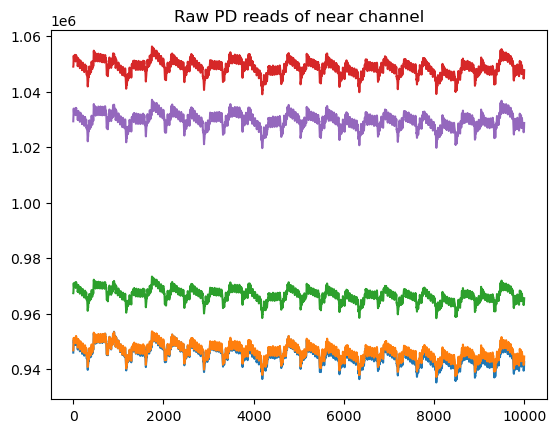

In [ ]:
# Load any data you want to convert
pd_reads = pd.read_csv('data/test_data.csv').to_numpy().T 
print(f"Shape of the data: nchans={pd_reads.shape[0]}, ndatapoints={pd_reads.shape[1]}")

plt.plot(pd_reads[:5,:].T)
plt.title("Raw PD reads of near channel")

# Pass the raw data to the class. The class will do the conversion and cleaning
hb = HbConvert(pd_reads)

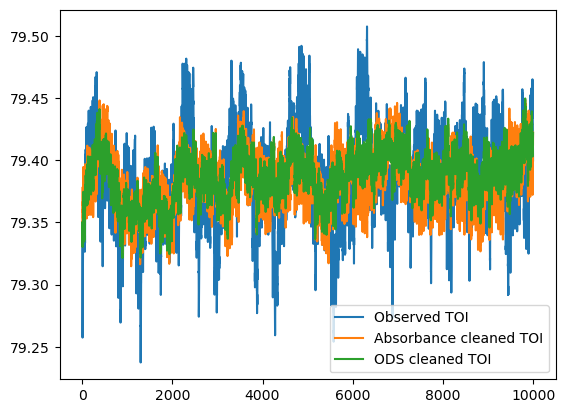

In [28]:
# The TOI is cleaned with two methods: absorbance and ods
# For absorbance, the svd-cleaned near and far channels are used to calculate toi
# For ods, the svd-cleaned optical density gradients are convert to toi
plt.plot(hb.observed.toi)
plt.plot(hb.cleaned.toi_abs)
plt.plot(hb.cleaned.toi_ods)
plt.legend(["Observed TOI", "Absorbance cleaned TOI", "ODS cleaned TOI"])

SVDDiagnostics(near=SVDCleaned(uvar=0.038), far=SVDCleaned(uvar=0.024), ods=SVDCleaned(uvar=0.030))
SVDCleaned(uvar=0.038)


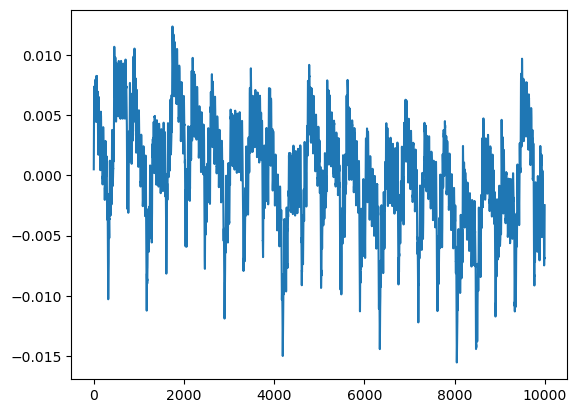

In [22]:
# There is some diagnostic information present, to help assess the SVD cleaning
# You can see the variance of the first component across all channels
print(hb.svd_diagnostics)
print(hb.svd_diagnostics.near) # uvar < 0.1 corresponds to good cleaning

# You can also get the "noise" component that was removed from the data
plt.plot(hb.svd_diagnostics.near.noise)


In [29]:
hb

HbConvert(observed=NIRSData(shape=(12, 9998)), cleaned=NIRSData(shape=(12, 9998)), svd_diagnostics=SVDDiagnostics(near=SVDCleaned(uvar=0.038), far=SVDCleaned(uvar=0.024), ods=SVDCleaned(uvar=0.030)))